# Zillow Project

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.preprocessing


# Modeling section
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.metrics import explained_variance_score


import seaborn as sns
import os
from env import host, user, password
import acquire
import prepare

### Acquire

In [3]:
df = acquire.new_zillow_data()
df.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,lotsizesquarefeet,poolcnt,regionidzip,yearbuilt,latitude,longitude,taxvaluedollarcnt,garagetotalsqft,regionidcounty,regionidcity,transactiondate
0,3.5,4.0,3100.0,6059.0,4506.0,NaN,96978.0,1998.0,33634931.0,-117869207.0,1023282.0,633.0,1286.0,53571.0,2017-01-01
1,1.0,2.0,1465.0,6111.0,12647.0,NaN,97099.0,1967.0,34449266.0,-119281531.0,464000.0,0.0,2061.0,13091.0,2017-01-01
2,2.0,3.0,1243.0,6059.0,8432.0,1.0,97078.0,1962.0,33886168.0,-117823170.0,564778.0,440.0,1286.0,21412.0,2017-01-01
3,3.0,4.0,2376.0,6037.0,13038.0,1.0,96330.0,1970.0,34245180.0,-118240722.0,145143.0,NaN,3101.0,396551.0,2017-01-01
4,3.0,4.0,2962.0,6037.0,63000.0,1.0,96293.0,1950.0,34145202.0,-118179824.0,773303.0,NaN,3101.0,47019.0,2017-01-01


In [4]:
df= df.rename(columns = {'bathroomcnt' : 'bathrooms',
                     'bedroomcnt' : 'bedrooms',
                     'calculatedfinishedsquarefeet' : 'total_living_area',
                     'lotsizesquarefeet' : 'lot_size',
                     'poolcnt' : 'pools',
                     'yearbuilt' : 'year_built',
                     'taxvaluedollarcnt' : 'tax_value',
                     'garagetotalsqft' : 'garage_area',
                    'regionidzip' : 'zip_code',
                         
                     })

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52441 entries, 0 to 52440
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bathrooms          52441 non-null  float64
 1   bedrooms           52441 non-null  float64
 2   total_living_area  52359 non-null  float64
 3   fips               52441 non-null  float64
 4   lot_size           52072 non-null  float64
 5   pools              11096 non-null  float64
 6   zip_code           52415 non-null  float64
 7   year_built         52325 non-null  float64
 8   latitude           52441 non-null  float64
 9   longitude          52441 non-null  float64
 10  tax_value          52440 non-null  float64
 11  garage_area        18015 non-null  float64
 12  regionidcounty     52441 non-null  float64
 13  regionidcity       51404 non-null  float64
 14  transactiondate    52441 non-null  object 
dtypes: float64(14), object(1)
memory usage: 6.0+ MB


In [6]:
df.regionidcounty.unique()

array([1286., 2061., 3101.])

In [7]:
df.shape

(52441, 15)

### Acquire Takeways

- Not Null Count is different for each column, we will make them same by deleting rows.
- For Houses with NaN for pools, we assume it has no pool and make it 0.
- For Houses with Nan for garage_area, we will assume they have no garge, so make its garage_area 0.


### Prepare

Details on wrangle_zillow on prepare.py,

In [8]:
df = prepare.wrangle_zillow(df)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50906 entries, 0 to 52440
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bathrooms          50906 non-null  float64
 1   bedrooms           50906 non-null  float64
 2   total_living_area  50906 non-null  float64
 3   fips               50906 non-null  float64
 4   lot_size           50906 non-null  float64
 5   pools              50906 non-null  float64
 6   zip_code           50906 non-null  float64
 7   year_built         50906 non-null  float64
 8   latitude           50906 non-null  float64
 9   longitude          50906 non-null  float64
 10  tax_value          50906 non-null  float64
 11  garage_area        50906 non-null  float64
 12  regionidcounty     50906 non-null  float64
 13  regionidcity       50906 non-null  float64
 14  transactiondate    50906 non-null  object 
dtypes: float64(14), object(1)
memory usage: 6.2+ MB


In [10]:
df.head()

,bathrooms,bedrooms,total_living_area,fips,lot_size,pools,zip_code,year_built,latitude,longitude,tax_value,garage_area,regionidcounty,regionidcity,transactiondate
0,3.5,4.0,3100.0,6059.0,4506.0,0.0,96978.0,1998.0,33634931.0,-117869207.0,1023282.0,633.0,1286.0,53571.0,2017-01-01
1,1.0,2.0,1465.0,6111.0,12647.0,0.0,97099.0,1967.0,34449266.0,-119281531.0,464000.0,0.0,2061.0,13091.0,2017-01-01
2,2.0,3.0,1243.0,6059.0,8432.0,1.0,97078.0,1962.0,33886168.0,-117823170.0,564778.0,440.0,1286.0,21412.0,2017-01-01
3,3.0,4.0,2376.0,6037.0,13038.0,1.0,96330.0,1970.0,34245180.0,-118240722.0,145143.0,0.0,3101.0,396551.0,2017-01-01
4,3.0,4.0,2962.0,6037.0,63000.0,1.0,96293.0,1950.0,34145202.0,-118179824.0,773303.0,0.0,3101.0,47019.0,2017-01-01


In [11]:
df.shape

(50906, 15)

### Visualization

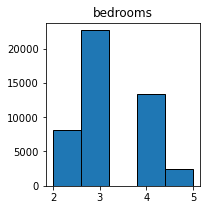

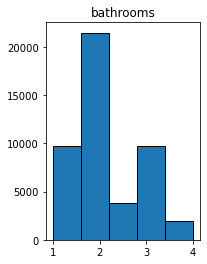

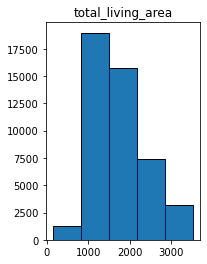

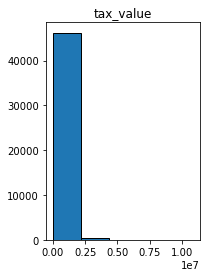

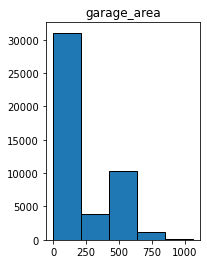

<Figure size 1152x288 with 0 Axes>

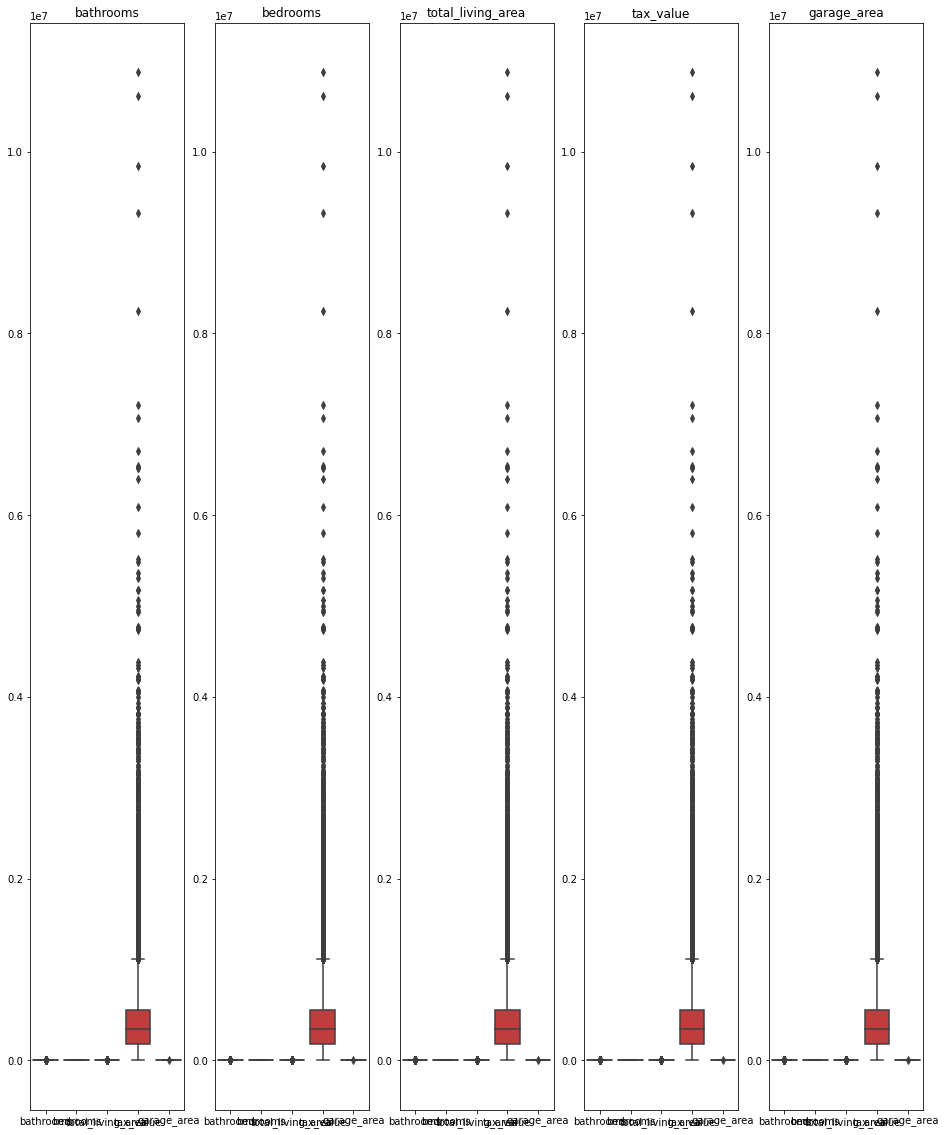

In [12]:
# Removing Possible outliers from dataframes and showing histrogram and boxplot
df = prepare.prepare_zillow(df)

In [13]:
df.shape

(46553, 15)

In [14]:
df['age'] = 2021- df.year_built

In [15]:
df.head()

,bathrooms,bedrooms,total_living_area,fips,lot_size,pools,zip_code,year_built,latitude,longitude,tax_value,garage_area,regionidcounty,regionidcity,transactiondate,age
0,3.5,4.0,3100.0,6059.0,4506.0,0.0,96978.0,1998.0,33634931.0,-117869207.0,1023282.0,633.0,1286.0,53571.0,2017-01-01,23.0
1,1.0,2.0,1465.0,6111.0,12647.0,0.0,97099.0,1967.0,34449266.0,-119281531.0,464000.0,0.0,2061.0,13091.0,2017-01-01,54.0
2,2.0,3.0,1243.0,6059.0,8432.0,1.0,97078.0,1962.0,33886168.0,-117823170.0,564778.0,440.0,1286.0,21412.0,2017-01-01,59.0
3,3.0,4.0,2376.0,6037.0,13038.0,1.0,96330.0,1970.0,34245180.0,-118240722.0,145143.0,0.0,3101.0,396551.0,2017-01-01,51.0
4,3.0,4.0,2962.0,6037.0,63000.0,1.0,96293.0,1950.0,34145202.0,-118179824.0,773303.0,0.0,3101.0,47019.0,2017-01-01,71.0


In [16]:
# df = prepare.wrangle_zillow_split(df)
df.shape

(46553, 16)

In [17]:
# splitting df into train, test, validate
train, test, validate = prepare.wrangle_zillow_split(df)

In [18]:
train.head()

,bathrooms,bedrooms,total_living_area,fips,lot_size,pools,zip_code,year_built,latitude,longitude,tax_value,garage_area,regionidcounty,regionidcity,transactiondate,age
3113,2.0,3.0,1101.0,6111.0,6000.0,0.0,97113.0,1956.0,34338603.0,-119076653.0,333000.0,441.0,2061.0,26965.0,2017-01-23,65.0
23583,1.0,3.0,1129.0,6059.0,6000.0,0.0,97003.0,1920.0,33749797.0,-117914617.0,29207.0,261.0,1286.0,47568.0,2017-05-11,101.0
6474,2.0,5.0,1968.0,6037.0,13860.0,1.0,96514.0,1928.0,34108965.0,-118090622.0,566699.0,0.0,3101.0,33837.0,2017-02-14,93.0
14036,3.0,4.0,1644.0,6059.0,5085.0,0.0,96962.0,1978.0,33653984.0,-117657362.0,244497.0,493.0,1286.0,32380.0,2017-03-28,43.0
37238,2.0,4.0,2099.0,6037.0,8454.0,0.0,97319.0,1972.0,34684135.0,-118176253.0,84250.0,0.0,3101.0,5534.0,2017-07-07,49.0


In [19]:
validate.head()

,bathrooms,bedrooms,total_living_area,fips,lot_size,pools,zip_code,year_built,latitude,longitude,tax_value,garage_area,regionidcounty,regionidcity,transactiondate,age
9140,2.0,3.0,1826.0,6037.0,6622.0,0.0,96273.0,1963.0,34154584.0,-118017331.0,300146.0,0.0,3101.0,32923.0,2017-03-01,58.0
19528,3.0,5.0,2573.0,6111.0,14408.0,1.0,96383.0,1969.0,34209435.0,-118881200.0,517569.0,580.0,2061.0,34278.0,2017-04-24,52.0
13179,2.0,3.0,1208.0,6037.0,5277.0,0.0,96215.0,1961.0,33839301.0,-118090331.0,144786.0,0.0,3101.0,12292.0,2017-03-23,60.0
47158,2.0,3.0,1181.0,6037.0,6350.0,0.0,97317.0,1955.0,34705573.0,-118154675.0,36192.0,0.0,3101.0,5534.0,2017-08-24,66.0
34564,3.0,3.0,2480.0,6037.0,7565.0,0.0,96058.0,1952.0,34113879.0,-118463140.0,827374.0,0.0,3101.0,12447.0,2017-06-27,69.0


In [20]:
test.head()

,bathrooms,bedrooms,total_living_area,fips,lot_size,pools,zip_code,year_built,latitude,longitude,tax_value,garage_area,regionidcounty,regionidcity,transactiondate,age
3221,1.0,2.0,887.0,6037.0,5450.0,0.0,96242.0,1950.0,33822669.0,-118111456.0,435855.0,0.0,3101.0,46298.0,2017-01-23,71.0
15568,3.0,4.0,2826.0,6059.0,5050.0,0.0,97037.0,2001.0,33925661.0,-117840806.0,613220.0,593.0,1286.0,17150.0,2017-04-04,20.0
16856,2.0,3.0,1665.0,6037.0,74764.0,0.0,96524.0,1952.0,34062822.0,-117870907.0,751400.0,0.0,3101.0,14542.0,2017-04-11,69.0
23116,2.0,3.0,1412.0,6059.0,7244.0,0.0,97023.0,1962.0,33810759.0,-117948770.0,89511.0,506.0,1286.0,16764.0,2017-05-09,59.0
42698,2.0,3.0,1446.0,6111.0,7773.0,0.0,97118.0,1961.0,34275557.0,-118747937.0,391330.0,388.0,2061.0,27110.0,2017-08-01,60.0


### Takeaways
- We can see that lot_size and tax_value has outlier but still I choose to keep them because lot size can in real varies from land to land because some house may seat in 0.20 acre and some may set on 20  to even 100 acres. While I was trying to use outliers to remove outliers from tax_value, it takes more than 20% of my data, so I choose not to use outlier on it. As it is my target variables. 
- Still a few outliers despite the relatively restrictive 1.5 * IQR setting for the upper/lower boundary
- If we presume that we are going to use our data to build a model that focuses on median home values, then we can drop these outliers.

# Scaling

In [21]:
# Split into x / y | features / target

# Setup X and y
X_train = train.drop(columns=['tax_value', 'transactiondate'])
y_train = train.tax_value

X_validate = validate.drop(columns=['tax_value', 'transactiondate'])
y_validate = validate.tax_value

X_test = test.drop(columns=['tax_value', 'transactiondate'])
y_test = test.tax_value

In [99]:
X_train.head()

,bathrooms,bedrooms,total_living_area,fips,lot_size,pools,zip_code,year_built,latitude,longitude,garage_area,regionidcounty,regionidcity,age
3113,2.0,3.0,1101.0,6111.0,6000.0,0.0,97113.0,1956.0,34338603.0,-119076653.0,441.0,2061.0,26965.0,65.0
23583,1.0,3.0,1129.0,6059.0,6000.0,0.0,97003.0,1920.0,33749797.0,-117914617.0,261.0,1286.0,47568.0,101.0
6474,2.0,5.0,1968.0,6037.0,13860.0,1.0,96514.0,1928.0,34108965.0,-118090622.0,0.0,3101.0,33837.0,93.0
14036,3.0,4.0,1644.0,6059.0,5085.0,0.0,96962.0,1978.0,33653984.0,-117657362.0,493.0,1286.0,32380.0,43.0
37238,2.0,4.0,2099.0,6037.0,8454.0,0.0,97319.0,1972.0,34684135.0,-118176253.0,0.0,3101.0,5534.0,49.0


Since we have lots of outliers for data, I am using Robust Scalar to do further evaluation.

Text(0.5, 1.0, 'Scaled')

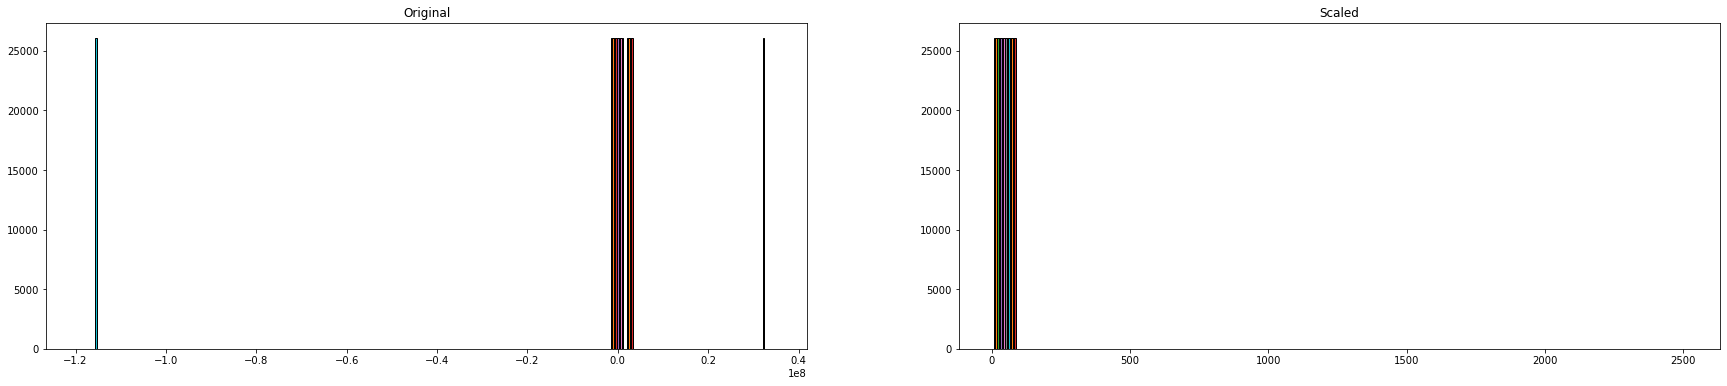

In [139]:


scaler = sklearn.preprocessing.RobustScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_validate_scaled = scaler.transform(X_validate)
X_test_scaled = scaler.transform(X_test)

plt.figure(figsize=(30, 6))
plt.subplot(121)
plt.hist(X_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(X_train_scaled, bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

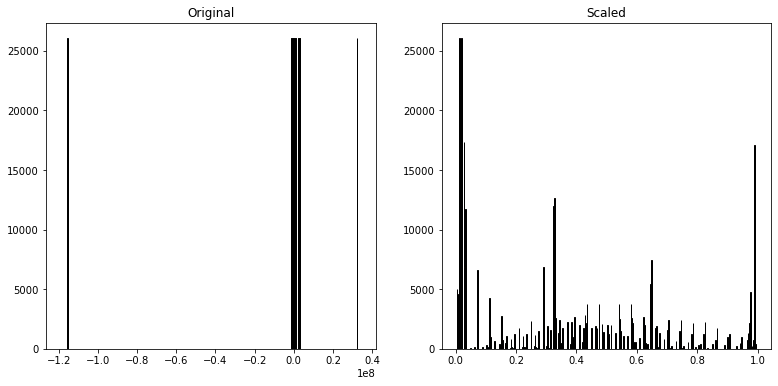

In [24]:
# MinMax Scaling
scaler = sklearn.preprocessing.MinMaxScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_validate_scaled = scaler.transform(X_validate)
X_test_scaled = scaler.transform(X_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(X_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(X_train_scaled, bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

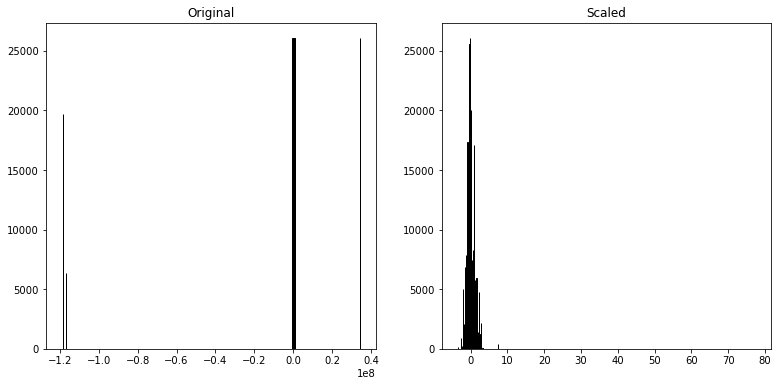

In [25]:
# StandardScalar
scaler = sklearn.preprocessing.StandardScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_validate_scaled = scaler.transform(X_validate)
X_test_scaled = scaler.transform(X_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(X_train, bins=100, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(X_train_scaled, bins=100, ec='black')
plt.title('Scaled')

### Exploration

In [27]:

#def plot_variable_pairs(df):
#    """Takes a DataFrame and all of the pairwise relationships along with the regression line for each pair"""
#    sns.pairplot(df, kind="reg",plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.9}})
#   plt.show()

In [28]:
# train_sub = train[['bathrooms', 'bedrooms', 'total_living_area', 'tax_value', 'lot_size', 'garage_area', 'age']]

In [29]:
# plot_variable_pairs(train_sub )

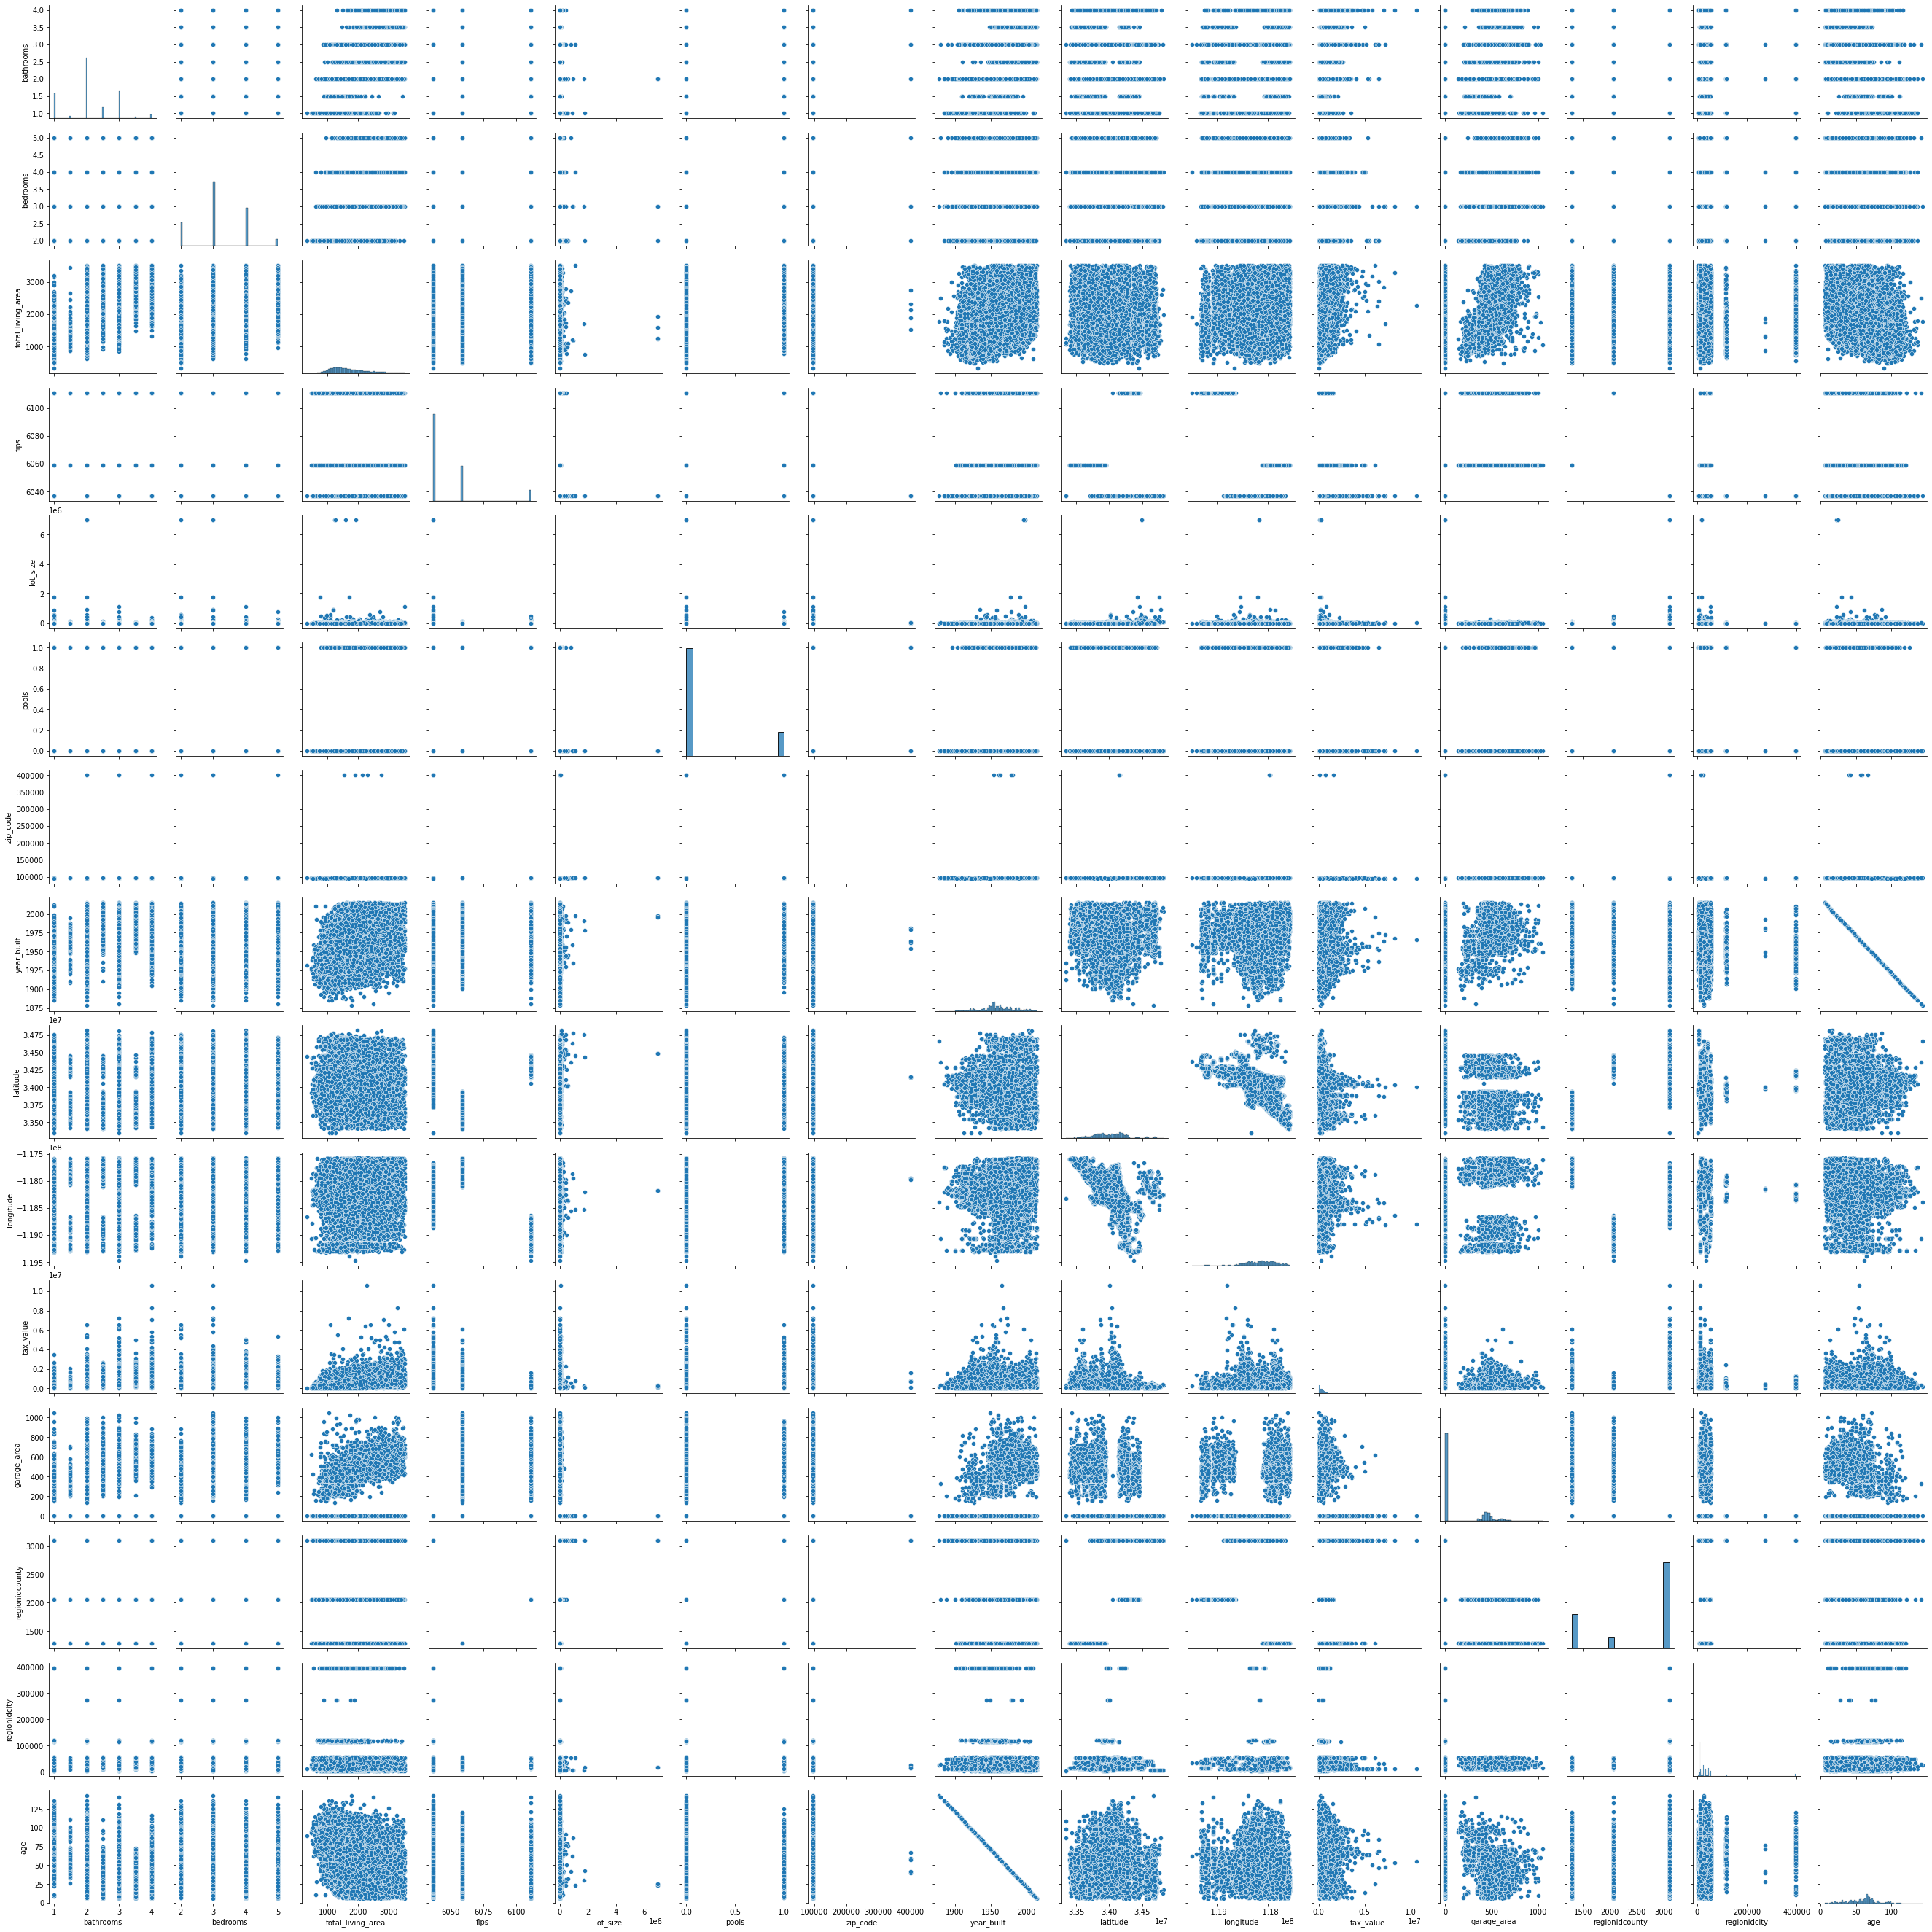

In [30]:
sns.pairplot(train)

In [31]:
# Create the correlation matrix for all exams.

zillow_corr = train.drop(columns=['year_built', 'fips', 'lot_size', 'pools', 'zip_code', 'latitude', 'longitude', 'transactiondate', 'regionidcounty', 'regionidcity']).corr()
zillow_corr

,bathrooms,bedrooms,total_living_area,tax_value,garage_area,age
bathrooms,1.000000,0.570030,0.777223,0.353059,0.237228,-0.522654
bedrooms,0.570030,1.000000,0.591332,0.140197,0.223000,-0.342965
total_living_area,0.777223,0.591332,1.000000,0.421544,0.277407,-0.454505
tax_value,0.353059,0.140197,0.421544,1.000000,0.114974,-0.112570
garage_area,0.237228,0.223000,0.277407,0.114974,1.000000,-0.410213
age,-0.522654,-0.342965,-0.454505,-0.112570,-0.410213,1.000000


<AxesSubplot:>

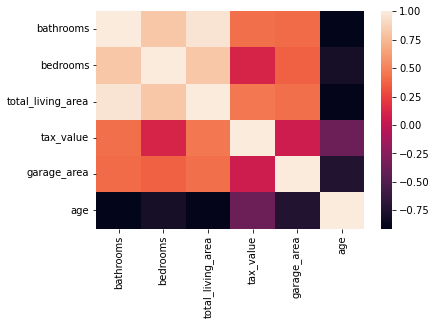

In [32]:
sns.heatmap(zillow_corr.corr())

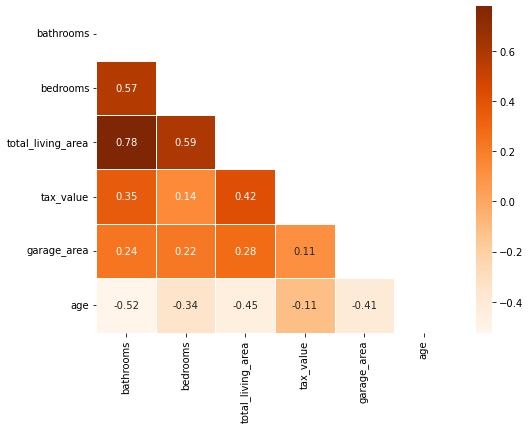

In [62]:
plt.figure(figsize=(8,6))
sns.heatmap(zillow_corr, cmap='Oranges', annot=True, linewidth=0.5, mask= np.triu(zillow_corr))


plt.show()

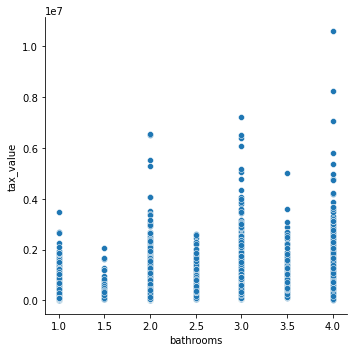

In [34]:
# relplot
sns.relplot(x="bathrooms", y="tax_value", data=train)
plt.show()

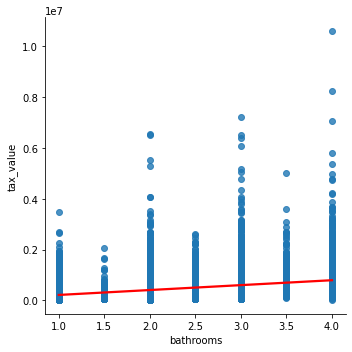

In [35]:
# I can really pop that line color if I want.

sns.lmplot(x="bathrooms", y="tax_value", data=train, line_kws={'color': 'red'})
plt.show()

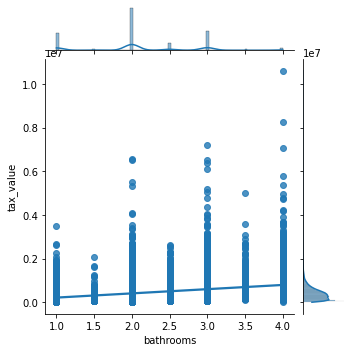

In [36]:
sns.jointplot(x="bathrooms", y="tax_value", data=train,  kind='reg', height=5)
plt.show()

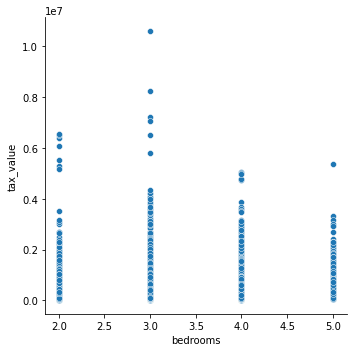

In [37]:
# relplot
sns.relplot(x="bedrooms", y="tax_value", data=train)
plt.show()

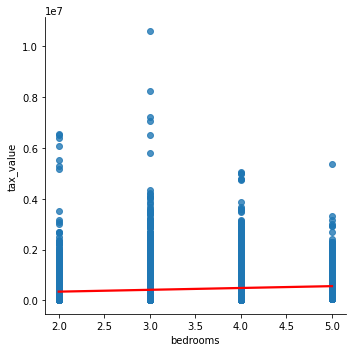

In [38]:
# I can really pop that line color if I want.

sns.lmplot(x="bedrooms", y="tax_value", data=train, line_kws={'color': 'red'})
plt.show()

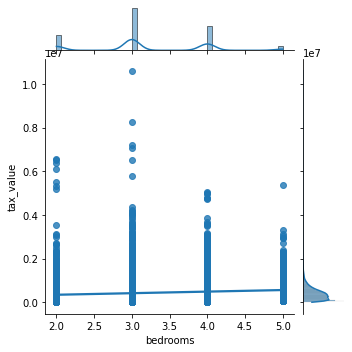

In [39]:
sns.jointplot(x="bedrooms", y="tax_value", data=train,  kind='reg', height=5)
plt.show()

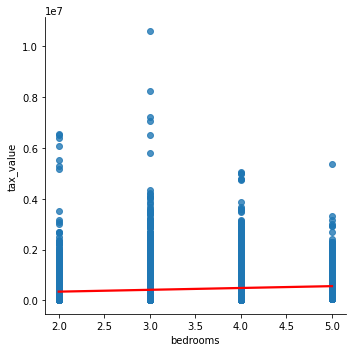

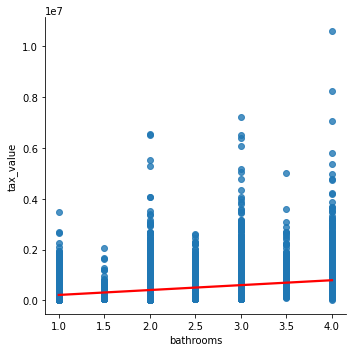

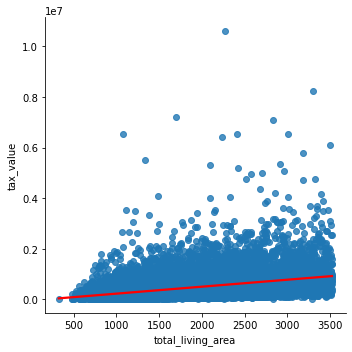

In [40]:
col_list = ['bedrooms', 'bathrooms', 'total_living_area']
for col in col_list:
    sns.lmplot(x=col, y="tax_value", data=train, line_kws={'color': 'red'})
    plt.show()
    

In [ ]:
#col_list = ['bedrooms', 'bathrooms', 'total_living_area']
#for col in col_list:
sns.lmplot(x=col, y="tax_value", data=train, line_kws={'color': 'red'})
plt.show()

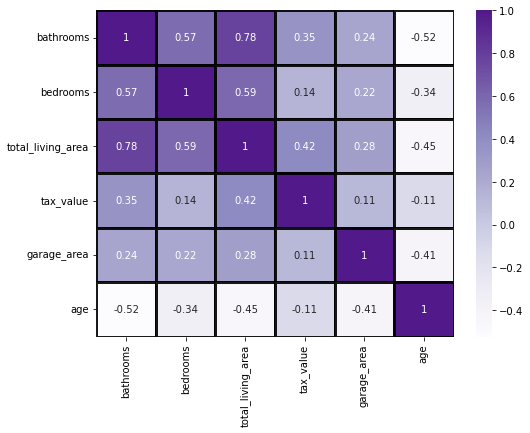

In [72]:
# Pass my correlation matrix to Seaborn's heatmap.

kwargs = {'alpha':0.9,'linewidth':3, 'linestyle':'-', 
          'linecolor':'k','rasterized':False, 'edgecolor':'r', 
          'capstyle':'projecting',}

plt.figure(figsize=(8,6))
sns.heatmap(zillow_corr, cmap='Purples', annot=True, **kwargs)


plt.show()

whole data

In [47]:
train_new = train.drop(columns = ['year_built', 'fips', 'latitude', 'longitude', 'transactiondate']).corr()

In [63]:
train_new

,bathrooms,bedrooms,total_living_area,lot_size,pools,zip_code,tax_value,garage_area,regionidcounty,regionidcity,age
bathrooms,1.000000,0.570030,0.777223,0.009810,0.239927,0.033732,0.353059,0.237228,-0.171891,-0.049096,-0.522654
bedrooms,0.570030,1.000000,0.591332,-0.000246,0.194882,0.019034,0.140197,0.223000,-0.159028,-0.043988,-0.342965
total_living_area,0.777223,0.591332,1.000000,0.016619,0.290054,0.026541,0.421544,0.277407,-0.180208,-0.044868,-0.454505
lot_size,0.009810,-0.000246,0.016619,1.000000,0.005969,0.005229,0.000670,-0.017257,0.022292,-0.008028,-0.029070
pools,0.239927,0.194882,0.290054,0.005969,1.000000,0.015938,0.152346,0.057866,-0.027579,-0.024623,-0.072607
zip_code,0.033732,0.019034,0.026541,0.005229,0.015938,1.000000,0.004113,0.048557,-0.049674,-0.012178,-0.059247
tax_value,0.353059,0.140197,0.421544,0.000670,0.152346,0.004113,1.000000,0.114974,-0.088024,-0.016510,-0.112570
garage_area,0.237228,0.223000,0.277407,-0.017257,0.057866,0.048557,0.114974,1.000000,-0.912099,-0.062450,-0.410213
regionidcounty,-0.171891,-0.159028,-0.180208,0.022292,-0.027579,-0.049674,-0.088024,-0.912099,1.000000,0.064516,0.356818
regionidcity,-0.049096,-0.043988,-0.044868,-0.008028,-0.024623,-0.012178,-0.016510,-0.062450,0.064516,1.000000,0.079150


<AxesSubplot:>

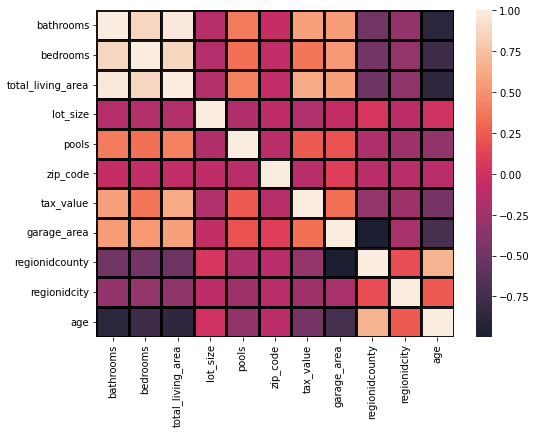

In [71]:
plt.figure(figsize=(8,6))

kwargs = {'alpha':0.9,'linewidth':3, 'linestyle':'-', 
          'linecolor':'k','rasterized':False, 'edgecolor':'r', 
          'capstyle':'projecting',}
sns.heatmap(train_new.corr(), **kwargs)

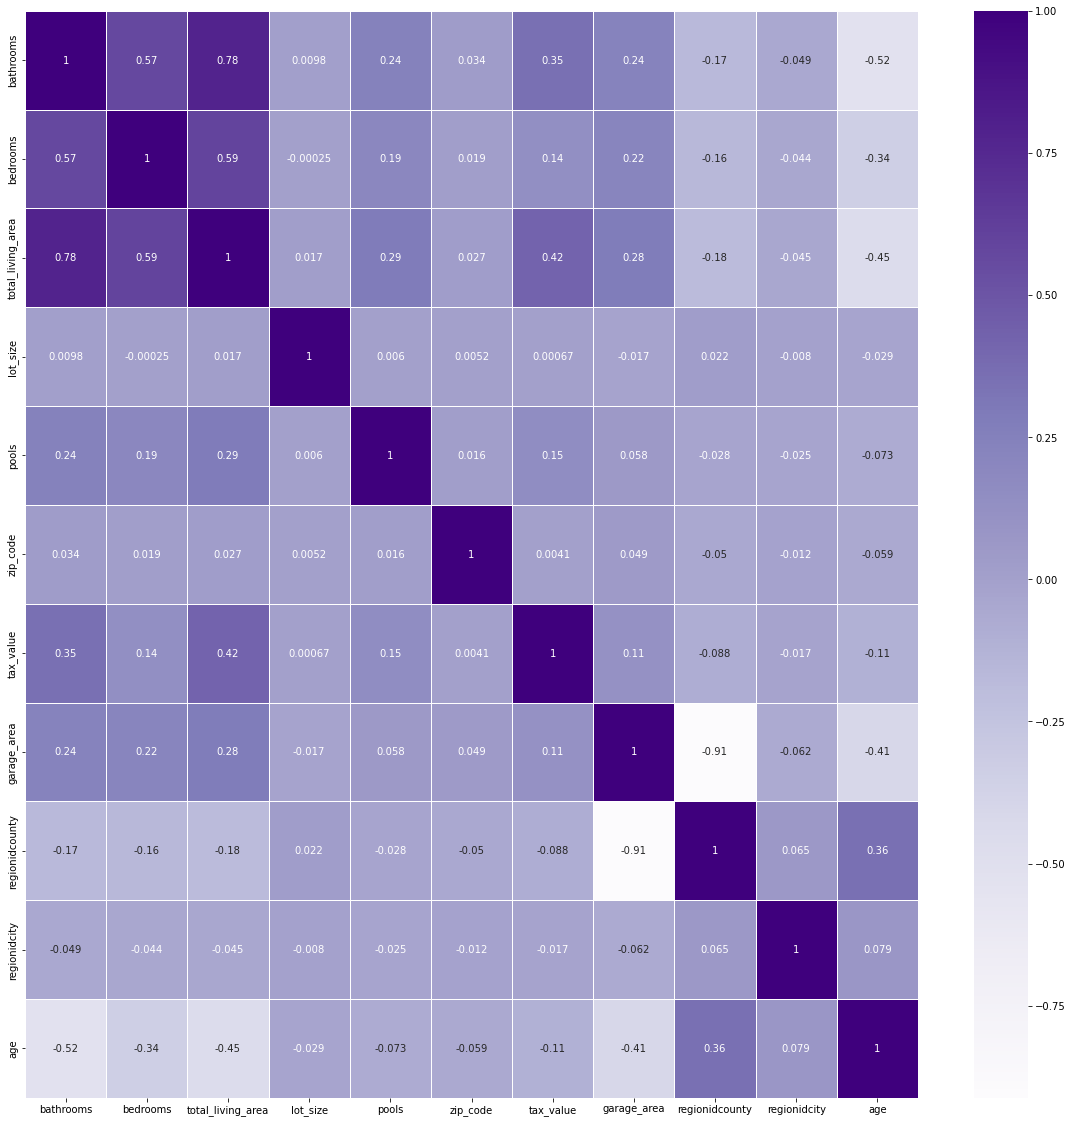

In [73]:
plt.figure(figsize=(20,20))
sns.heatmap(train_new, cmap='Purples', annot=True, linewidth=0.5)


plt.show()

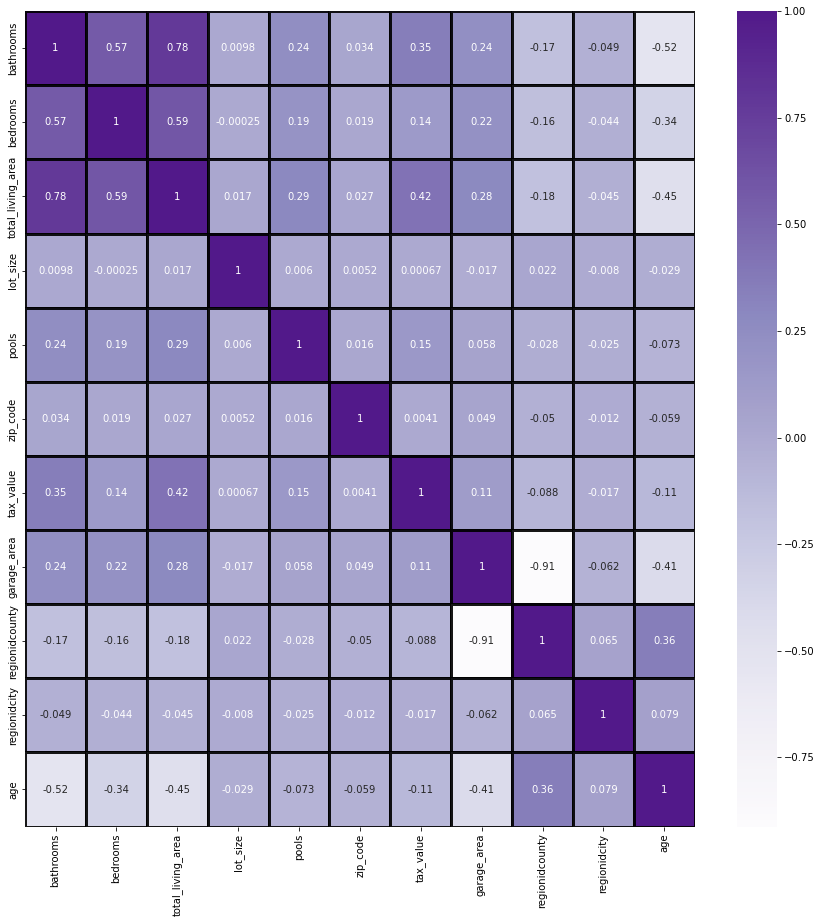

In [75]:
# Pass my correlation matrix to Seaborn's heatmap.

kwargs = {'alpha':.9,'linewidth':3, 'linestyle':'-', 
          'linecolor':'k','rasterized':False, 'edgecolor':'w', 
          'capstyle':'projecting',}

plt.figure(figsize=(15,15))
sns.heatmap(train_new, cmap='Purples', annot=True, **kwargs)


plt.show()

In [70]:
train.corr()['tax_value'].sort_values()

latitude            -0.160961
age                 -0.112570
regionidcounty      -0.088024
longitude           -0.038544
regionidcity        -0.016510
lot_size             0.000670
zip_code             0.004113
fips                 0.044484
year_built           0.112570
garage_area          0.114974
bedrooms             0.140197
pools                0.152346
bathrooms            0.353059
total_living_area    0.421544
tax_value            1.000000
Name: tax_value, dtype: float64

# Exploration Takeaways

Tax value has positive correlation with total_living_area, bathrooms, pools, bedrooms, garage_area and 
where as negative correlations with age, latitude and longitude.

### Use SelectKBest Feature Engineering to find features that have strong relationship y. 

In [80]:
from sklearn.feature_selection import SelectKBest, f_regression

# parameters: f_regression stats test, give me 4 features
f_selector = SelectKBest(f_regression, k=4)

# find the top 8 X's correlated with y
f_selector.fit(X_train, y_train)

# boolean mask of whether the column was selected or not. 
feature_mask = f_selector.get_support()

# get list of top K features. 
f_feature = X_train.iloc[:,feature_mask].columns.tolist()

In [81]:
f_feature

['bathrooms', 'total_living_area', 'pools', 'latitude']

### Use Recursive Feature Engineering to find top 2 features

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# initialize the ML algorithm
lm = LinearRegression()

# create the rfe object, indicating the ML object (lm) and the number of features I want to end up with. 
rfe = RFE(estimator=lm, n_features_to_select=3)

# fit the data using RFE
rfe.fit(X_train,y_train)  

# get the mask of the columns selected
feature_mask = rfe.support_

# get list of the column names. 
rfe_feature = X_train.iloc[:,feature_mask].columns.tolist()

In [89]:
rfe_feature

['year_built', 'age']

### Modeling

In [92]:
df.shape

(46553, 16)

In [94]:
train, validate, test = prepare.wrangle_zillow_split(df)

In [95]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26069 entries, 3113 to 31031
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bathrooms          26069 non-null  float64
 1   bedrooms           26069 non-null  float64
 2   total_living_area  26069 non-null  float64
 3   fips               26069 non-null  float64
 4   lot_size           26069 non-null  float64
 5   pools              26069 non-null  float64
 6   zip_code           26069 non-null  float64
 7   year_built         26069 non-null  float64
 8   latitude           26069 non-null  float64
 9   longitude          26069 non-null  float64
 10  tax_value          26069 non-null  float64
 11  garage_area        26069 non-null  float64
 12  regionidcounty     26069 non-null  float64
 13  regionidcity       26069 non-null  float64
 14  transactiondate    26069 non-null  object 
 15  age                26069 non-null  float64
dtypes: float64(15), obj

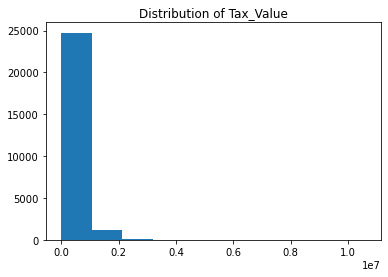

In [102]:
plt.hist(y_train)
plt.title('Distribution of Tax_Value')
plt.show()

In [105]:
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

In [ ]:
# Baseline

In [106]:
# Wait
def baseline(y_train, y_validate, metric_df):
    mean = y_train.tax_value.mean() # Train Mean
    y_train['tax_value_pred_mean'] = mean
    y_validate['tax_value_pred_mean'] = mean
    
    # make our first entry into the metric_df with median baseline
    metric_df = make_metric_df(y_validate.tax_value,
                           y_validate.tax_value_pred_mean,
                           'mean_baseline',
                          metric_df)
    return metric_df

In [109]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values. 
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

# 1. Predict tax_value_pred_mean
tax_value_pred_mean = y_train['tax_value'].mean() # train mean
y_train['tax_value_pred_mean'] = tax_value_pred_mean
y_validate['tax_value_pred_mean'] = tax_value_pred_mean

# 2. compute tax_value_pred_median
tax_value_pred_median = y_train['tax_value'].median() # train median
y_train['tax_value_pred_median'] = tax_value_pred_median
y_validate['tax_value_pred_median'] = tax_value_pred_median

# 3. RMSE of tax_value_pred_mean
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_mean)**(1/2)
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_mean)**(1/2)

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

# 4. RMSE of tax_value_pred_median
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_median)**(1/2)
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_median)**(1/2)

print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  406280.59 
Validate/Out-of-Sample:  390887.12
RMSE using Median
Train/In-Sample:  414353.51 
Validate/Out-of-Sample:  399240.08


###### We can say that both rmse on train and validate is low for mean than median. So we will take mean as our baseline.

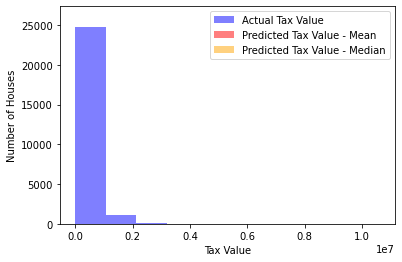

In [110]:
# plot to visualize actual vs predicted. 
plt.hist(y_train.tax_value, color='blue', alpha=.5, label="Actual Tax Value")
plt.hist(y_train.tax_value_pred_mean, bins=1, color='red', alpha=.5, rwidth=100, label="Predicted Tax Value - Mean")
plt.hist(y_train.tax_value_pred_median, bins=1, color='orange', alpha=.5, rwidth=100, label="Predicted Tax Value - Median")
plt.xlabel("Tax Value")
plt.ylabel("Number of Houses")
plt.legend()
plt.show()

### Ordinary Least Squares (OLS)

In [111]:
# create the model object
lm = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(X_train, y_train.tax_value)

LinearRegression(normalize=True)

In [112]:
# predict train
y_train['tax_value_pred_lm'] = lm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_lm)**(1/2)

# predict validate
y_validate['tax_value_pred_lm'] = lm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_lm)**(1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  350210.74749643874 
Validation/Out-of-Sample:  336032.16774982086


### LASSO + LARS

### alpha = 0

In [126]:

# create the model object
lars = LassoLars(alpha=0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars.fit(X_train, y_train.tax_value)

# predict train
y_train['tax_value_pred_lars'] = lars.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_lars)**(1/2)

# predict validate
y_validate['tax_value_pred_lars'] = lars.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_lars)**(1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Lasso + Lars
Training/In-Sample:  350211.7507774645 
Validation/Out-of-Sample:  336049.38083189167


### alpha = 0.001

In [124]:

# create the model object
lars = LassoLars(alpha=0.001)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars.fit(X_train, y_train.tax_value)

# predict train
y_train['tax_value_pred_lars'] = lars.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_lars)**(1/2)

# predict validate
y_validate['tax_value_pred_lars'] = lars.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_lars)**(1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Lasso + Lars
Training/In-Sample:  350211.7507796644 
Validation/Out-of-Sample:  336049.3640974707


### alpha = 0.5

In [122]:

# create the model object
lars = LassoLars(alpha= 0.5)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars.fit(X_train, y_train.tax_value)

# predict train
y_train['tax_value_pred_lars'] = lars.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_lars)**(1/2)

# predict validate
y_validate['tax_value_pred_lars'] = lars.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_lars)**(1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Lasso + Lars
Training/In-Sample:  350212.3007451947 
Validation/Out-of-Sample:  336041.601261978


###### alpha = 1

In [115]:

# create the model object
lars = LassoLars(alpha=1.0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars.fit(X_train, y_train.tax_value)

# predict train
y_train['tax_value_pred_lars'] = lars.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_lars)**(1/2)

# predict validate
y_validate['tax_value_pred_lars'] = lars.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_lars)**(1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Lasso + Lars
Training/In-Sample:  350213.9506432035 
Validation/Out-of-Sample:  336034.9993809447


### alpha = 2

In [116]:

# create the model object
lars = LassoLars(alpha=2.0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars.fit(X_train, y_train.tax_value)

# predict train
y_train['tax_value_pred_lars'] = lars.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_lars)**(1/2)

# predict validate
y_validate['tax_value_pred_lars'] = lars.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_lars)**(1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Lasso + Lars
Training/In-Sample:  350220.5501575118 
Validation/Out-of-Sample:  336025.3289507929


### TweedieRegressor (GLM)

In [142]:
# create the model object
glm = TweedieRegressor(power=1, alpha=0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_train, y_train.tax_value)

# predict train
y_train['tax_value_pred_glm'] = glm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_glm)**(1/2)

# predict validate
y_validate['tax_value_pred_glm'] = glm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_glm)**(1/2)

print("RMSE for GLM using Tweedie, power=1 & alpha=1\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for GLM using Tweedie, power=1 & alpha=1
Training/In-Sample:  406280.5891897938 
Validation/Out-of-Sample:  390887.1186153573


### Polynomial

### degree = 2

In [131]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate)
X_test_degree2 = pf.transform(X_test)

# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.tax_value)

# predict train
y_train['tax_value_pred_lm2'] = lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_lm2)**(1/2)

# predict validate
y_validate['tax_value_pred_lm2'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_lm2)**(1/2)

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  330763.4653776709 
Validation/Out-of-Sample:  335604.3409351177


### degree = 3

In [134]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=3)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate)
X_test_degree2 = pf.transform(X_test)

# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.tax_value)

# predict train
y_train['tax_value_pred_lm2'] = lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_lm2)**(1/2)

# predict validate
y_validate['tax_value_pred_lm2'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_lm2)**(1/2)

print("RMSE for Polynomial Model, degrees=3\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Polynomial Model, degrees=3
Training/In-Sample:  306382.0891070306 
Validation/Out-of-Sample:  84776921.41769952


### degree = 4

In [135]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=4)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate)
X_test_degree2 = pf.transform(X_test)

# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.tax_value)

# predict train
y_train['tax_value_pred_lm2'] = lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_lm2)**(1/2)

# predict validate
y_validate['tax_value_pred_lm2'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_lm2)**(1/2)

print("RMSE for Polynomial Model, degrees=4\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Polynomial Model, degrees=4
Training/In-Sample:  280287.30126790685 
Validation/Out-of-Sample:  575492262133.1873


### Modeling Takeways

In [ ]:
- Best Features were 'bathrooms', 'total_living_area', 'pools'
- Best Model was Polynomial with degree 2.

In [143]:
train, validate, test = prepare.wrangle_zillow_split(df)

In [145]:
train.shape

(26069, 16)

In [146]:
X_train = train[["bathrooms", "total_living_area", "pools"]]
y_train = train["tax_value"]

X_validate = validate[["bathrooms", "total_living_area", "pools"]]
y_validate = validate[["tax_value"]]

X_test = test[["bathrooms", "total_living_area", "pools"]]
y_test= test["tax_value"]

In [147]:
y_train  = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)
y_test = pd.DataFrame(y_test)

In [149]:

y_validate = pd.DataFrame(y_validate)
y_test = pd.DataFrame(y_test)


# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate)
X_test_degree2 = pf.transform(X_test)

# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.tax_value)

# predict test
y_test['tax_value_pred_lm2'] = lm2.predict(X_test_degree2)

# evaluate: rmse
rmse_test = mean_squared_error(y_test.tax_value, y_test.tax_value_pred_lm2)**(1/2)

# predict validate
y_validate['tax_value_pred_lm2'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_lm2)**(1/2)

print("RMSE for Polynomial Model, degrees=2\Test: ", round(rmse_test), 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Polynomial Model, degrees=2\Test:  349865 
Validation/Out-of-Sample:  372620.9478192376


In [152]:
explained_variance_score(y_test[['tax_value']], y_test['tax_value_pred_lm2'])

0.19887944693100812

### Test Takeaways

- Explained Variance = 0.20
- RMSE = 349865

TypeError: scatter() missing 1 required positional argument: 'y'

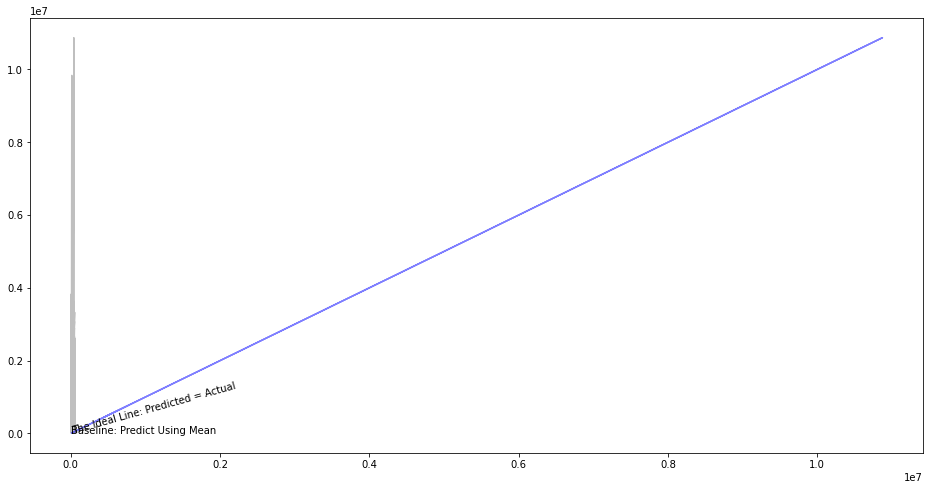